<a href="https://colab.research.google.com/github/AshuMaths1729/COVID_jobs/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

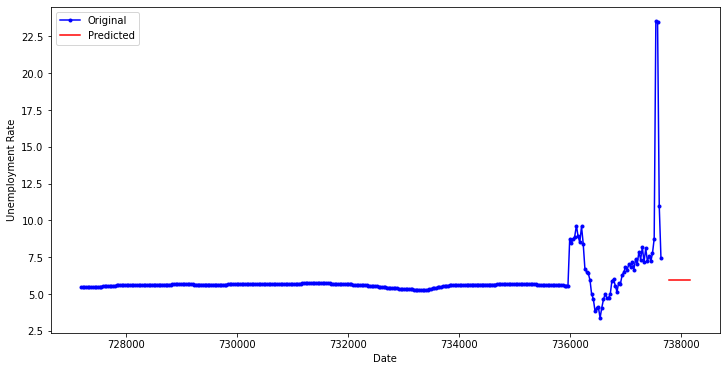

In [ ]:
from sklearn.svm import SVR
import pandas as pd 
import datetime
import numpy as np 
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os


fd = ['30-06-2019','31-07-2019','31-08-2019','30-09-2019','31-10-2019',\
  '30-11-2019','31-12-2019','31-01-2020','29-02-2020','31-03-2020','30-04-2020',\
    '31-05-2020','30-06-2020','31-07-2020','31-08-2020','30-09-2020','31-10-2020','30-11-2020',
    '31-12-2020','31-01-2021','28-02-2021','31-03-2021', '30-04-2021','31-05-2021',\
    '30-06-2021','31-07-2021','31-08-2021','30-09-2021','31-10-2021','30-11-2021','31-12-2021']
future_df = pd.DataFrame(fd, columns=['ds'])
future_df = future_df.reset_index()
future_df['ds'] = future_df['ds'].map(pd.to_datetime)
future_df['ds'] = future_df['ds'].map(mdates.date2num)
future_df = future_df['ds'].values
future_df = np.reshape(future_df, (len(future_df), 1))


fd = ['31-12-2020','31-01-2021','28-02-2021','31-03-2021', '30-04-2021','31-05-2021',\
    '30-06-2021','31-07-2021','31-08-2021','30-09-2021','31-10-2021','30-11-2021','31-12-2021']
unseen_df = pd.DataFrame(fd, columns=['ds'])
unseen_df = unseen_df.reset_index()
unseen_df['ds'] = unseen_df['ds'].map(pd.to_datetime)
unseen_df['ds'] = unseen_df['ds'].map(mdates.date2num)
unseen_df = unseen_df['ds'].values
unseen_df = np.reshape(unseen_df, (len(unseen_df), 1))


### Model
new_df2 = pd.read_csv('Monthly_Unemployment_1991-2020.csv')
new_df2['ds'] = pd.to_datetime(new_df2['ds'], yearfirst=True)

# change the dates into ints for training 
dates_df = new_df2.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['ds']

# convert to ints
dates_df['ds'] = dates_df['ds'].map(mdates.date2num)

dates_df.tail()

dates = dates_df['ds'].values
unemp_rates = new_df2['y'].values

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
unemp_rates = np.reshape(unemp_rates, (len(unemp_rates), 1))

svr = SVR(kernel= 'rbf', C=50, gamma=0.07)
svr.fit(dates, unemp_rates.ravel())

preds = svr.predict(unseen_df)

plt.figure(figsize = (12,6))
plt.plot(dates, unemp_rates, '.-b', label= 'Original')
plt.plot(unseen_df, preds, '-r', label= 'Predicted') 
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig("SVR_result.pdf")


In [ ]:
preds

array([5.95513196, 5.95513196, 5.95513196, 5.95513196, 5.95513196,
       5.95513196, 5.95513196, 5.95513196, 5.95513196, 5.95513196,
       5.95513196, 5.95513196, 5.95513196])